In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import rcParams
import matplotlib.pyplot as plt
import scipy.stats as st
from astropy.stats import LombScargle
import astropy.convolution as cv
from astropy.io import fits
sns.set_context('notebook')
plt.style.use('seaborn')
style = {
    'figure.figsize': (12, 8),
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'legend.fontsize': 14,
}
rcParams.update(style)
import pymc3 as pm

In [3]:
lc = pd.read_table('data/kplr007107778_kasoc-ts_slc_v1.dat', sep='\s+', comment='#', names=['time', 'flux', 'flux_error'], dtype='f8')
psd = pd.read_table('data/kplr007107778_kasoc-psd_slc_v1.pow', sep='\s+', comment='#', names=['freq', 'power'], dtype='f8')

In [5]:
mask = psd['freq'] > 12
full_freq = psd['freq'][mask].values
power = psd['power'][mask].values
fstep = 1
freq = np.arange(min(full_freq), max(full_freq), fstep)
smoothed_power = cv.convolve(power, cv.Box1DKernel(6 / (full_freq[1] - full_freq[0])))
itrp_power = np.interp(freq, full_freq, smoothed_power)
print(itrp_power.shape)

(8485,)


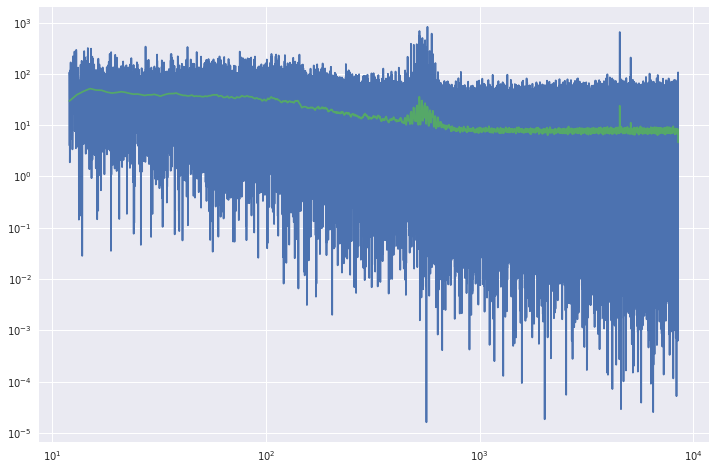

In [6]:
plt.loglog(full_freq, power)
plt.loglog(freq, itrp_power);

In [7]:
v_nyq = 8496.36
R_v = (np.sin( np.pi * freq / (2 * v_nyq)) / ((np.pi * freq) / (2 * v_nyq)))**2
k = 3
with pm.Model() as max_model:
    W = pm.Bound(pm.Normal, lower=0)('W', mu=12, sd=5)
    a = pm.Normal('a', mu=np.array([59, 67, 76]).reshape(k,1), sd=20, shape=(k,1))
    b = pm.Normal('b', mu=np.array([5, 150, 400]).reshape(k,1), sd=np.array([10, 50, 100]).reshape(k,1), shape=(k,1))
    
    harv = pm.math.sum(2 * pm.math.sqrt(2) / np.pi * (a**2 / b) / (1 + (freq/b)**4), axis=0)
    
    H0 = pm.Bound(pm.Normal, lower=0)('H0', mu=18, sd=10)
    v_max = pm.Bound(pm.Normal, lower=0)('v_max', mu=568, sd=10)
    s = pm.InverseGamma('s', alpha=41, beta=2225)
    env = H0 * pm.math.exp(-(freq - v_max)**2) / (2 * s**2)
    
    like = W + R_v * (harv + env)
    e = pm.HalfCauchy('e', 100)
    y = pm.Normal('obs', mu=like, sd=e, observed=itrp_power)
    


You can find the C code in this temporary file: /tmp/theano_compilation_error_bo47pomy
library inux-gnu/5.3.1/include-fixed/features.h:338:0, is not found.
library inux-gnu/5.3.1/include-fixed/limits.h:168, is not found.
library inux-gnu/5.3.1/include-fixed/syslimits.h:7, is not found.
library inux-gnu/5.3.1/include-fixed/limits.h:34, is not found.
library inux-gnu/5.3.1/include-fixed/features.h:338:0, is not found.
library inux-gnu/5.3.1/include-fixed/limits.h:168, is not found.
library inux-gnu/5.3.1/include-fixed/syslimits.h:7, is not found.
library inux-gnu/5.3.1/include-fixed/limits.h:34, is not found.


Exception: ("Compilation failed (return status=1): In file included from /usr/include/stdio.h:934:0,.                  from /home/ec2-user/anaconda3/include/python3.6m/Python.h:25,.                  from /home/ec2-user/.theano/compiledir_Linux-4.14-amzn1.x86_64-x86_64-with-glibc2.9-x86_64-3.6.4-64/tmpcwt_3_3e/mod.cpp:1:. /usr/include/bits/stdio.h: In function '__ssize_t getline(char**, size_t*, FILE*)':. /usr/include/bits/stdio.h:117:52: error: '__getdelim' was not declared in this scope.    return __getdelim (__lineptr, __n, '\\n', __stream);.                                                     ^. In file included from /home/ec2-user/anaconda3/include/python3.6m/Python.h:30:0,.                  from /home/ec2-user/.theano/compiledir_Linux-4.14-amzn1.x86_64-x86_64-with-glibc2.9-x86_64-3.6.4-64/tmpcwt_3_3e/mod.cpp:1:. /usr/include/string.h: At global scope:. /usr/include/string.h:544:5: error: '__locale_t' has not been declared.      __locale_t __loc).      ^. In file included from /home/ec2-user/mesa/mesasdk/lib/gcc/x86_64-pc-linux-gnu/5.3.1/include-fixed/features.h:338:0,.                  from /usr/include/limits.h:26,.                  from /home/ec2-user/mesa/mesasdk/lib/gcc/x86_64-pc-linux-gnu/5.3.1/include-fixed/limits.h:168,.                  from /home/ec2-user/mesa/mesasdk/lib/gcc/x86_64-pc-linux-gnu/5.3.1/include-fixed/syslimits.h:7,.                  from /home/ec2-user/mesa/mesasdk/lib/gcc/x86_64-pc-linux-gnu/5.3.1/include-fixed/limits.h:34,.                  from /home/ec2-user/anaconda3/include/python3.6m/Python.h:11,.                  from /home/ec2-user/.theano/compiledir_Linux-4.14-amzn1.x86_64-x86_64-with-glibc2.9-x86_64-3.6.4-64/tmpcwt_3_3e/mod.cpp:1:. /usr/include/string.h:545:33: error: nonnull argument references non-pointer operand (argument 3, operand 3).       __THROW __attribute_pure__ __nonnull ((1, 2, 3));.                                  ^. In file included from /home/ec2-user/anaconda3/include/python3.6m/Python.h:30:0,.                  from /home/ec2-user/.theano/compiledir_Linux-4.14-amzn1.x86_64-x86_64-with-glibc2.9-x86_64-3.6.4-64/tmpcwt_3_3e/mod.cpp:1:. /usr/include/string.h:548:18: error: '__locale_t' has not been declared.       size_t __n, __locale_t __loc).                   ^. In file included from /home/ec2-user/mesa/mesasdk/lib/gcc/x86_64-pc-linux-gnu/5.3.1/include-fixed/features.h:338:0,.                  from /usr/include/limits.h:26,.                  from /home/ec2-user/mesa/mesasdk/lib/gcc/x86_64-pc-linux-gnu/5.3.1/include-fixed/limits.h:168,.                  from /home/ec2-user/mesa/mesasdk/lib/gcc/x86_64-pc-linux-gnu/5.3.1/include-fixed/syslimits.h:7,.                  from /home/ec2-user/mesa/mesasdk/lib/gcc/x86_64-pc-linux-gnu/5.3.1/include-fixed/limits.h:34,.                  from /home/ec2-user/anaconda3/include/python3.6m/Python.h:11,.                  from /home/ec2-user/.theano/compiledir_Linux-4.14-amzn1.x86_64-x86_64-with-glibc2.9-x86_64-3.6.4-64/tmpcwt_3_3e/mod.cpp:1:. /usr/include/string.h:549:33: error: nonnull argument references non-pointer operand (argument 3, operand 4).       __THROW __attribute_pure__ __nonnull ((1, 2, 4));.                                  ^. ", '[Elemwise{Cast{float64}}(TensorConstant{0})]')

In [48]:
with max_model:
    trace = pm.sample(3000, tune=1000, njobs=8)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/home/ec2-user/anaconda3/lib/python3.6/site-packages/pymc3/model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: Elemwise{log,no_inplace}(TensorConstant{(1, 1) of ..3577297384})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/home/ec2-user/anaconda3/lib/python3.6/site-packages/theano/gof/opt.py", line 2019, in process_node
    replacements = lopt.transform(node)
  File "/home/ec2-user/anaconda3/lib/python3.6/site-packages/theano/tensor/opt.py", line 6507, in constant_folding
    no_recycling=[], impl=impl)
  File "/home/ec2-user/anaconda3/lib/python3.6/site-packages/theano/gof/op.p


You can find the C code in this temporary file: /tmp/theano_compilation_error_9_hss5q9

You can find the C code in this temporary file: /tmp/theano_compilation_error_724x1562

You can find the C code in this temporary file: /tmp/theano_compilation_error_vljsq94n


ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: Elemwise{log,no_inplace}(TensorConstant{(1, 1) of ..3577297384})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/home/ec2-user/anaconda3/lib/python3.6/site-packages/theano/gof/opt.py", line 2019, in process_node
    replacements = lopt.transform(node)
  File "/home/ec2-user/anaconda3/lib/python3.6/site-packages/theano/tensor/opt.py", line 6507, in constant_folding
    no_recycling=[], impl=impl)
  File "/home/ec2-user/anaconda3/lib/python3.6/site-packages/theano/gof/op.py", line 955, in make_thunk
    no_recycling)
  File "/home/ec2-user/anaconda3/lib/python3.6/site-packages/theano/gof/op.py", line 858, in make_c_thunk
    output_storage=node_output_storage)
  File "/home/ec2-user/anaconda3/lib/python3.6/site-packages/theano/gof/cc.py", line 1217, in make_thunk
    keep_lock=keep_lock)
  File "/home/ec2-user/anaconda3/lib/python3.6/s


You can find the C code in this temporary file: /tmp/theano_compilation_error_mv791vgj

You can find the C code in this temporary file: /tmp/theano_compilation_error_as12oowo


ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: Elemwise{log,no_inplace}(TensorConstant{(1, 1) of ..3577297384})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/home/ec2-user/anaconda3/lib/python3.6/site-packages/theano/gof/opt.py", line 2019, in process_node
    replacements = lopt.transform(node)
  File "/home/ec2-user/anaconda3/lib/python3.6/site-packages/theano/tensor/opt.py", line 6507, in constant_folding
    no_recycling=[], impl=impl)
  File "/home/ec2-user/anaconda3/lib/python3.6/site-packages/theano/gof/op.py", line 955, in make_thunk
    no_recycling)
  File "/home/ec2-user/anaconda3/lib/python3.6/site-packages/theano/gof/op.py", line 858, in make_c_thunk
    output_storage=node_output_storage)
  File "/home/ec2-user/anaconda3/lib/python3.6/site-packages/theano/gof/cc.py", line 1217, in make_thunk
    keep_lock=keep_lock)
  File "/home/ec2-user/anaconda3/lib/python3.6/s


You can find the C code in this temporary file: /tmp/theano_compilation_error_ur7agz2p

You can find the C code in this temporary file: /tmp/theano_compilation_error_dy69fc7c

You can find the C code in this temporary file: /tmp/theano_compilation_error_poxc75kq


ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: Elemwise{gt,no_inplace}(TensorConstant{(1, 1) of 20.0}, TensorConstant{(1, 1) of 0})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/home/ec2-user/anaconda3/lib/python3.6/site-packages/theano/gof/opt.py", line 2019, in process_node
    replacements = lopt.transform(node)
  File "/home/ec2-user/anaconda3/lib/python3.6/site-packages/theano/tensor/opt.py", line 6507, in constant_folding
    no_recycling=[], impl=impl)
  File "/home/ec2-user/anaconda3/lib/python3.6/site-packages/theano/gof/op.py", line 955, in make_thunk
    no_recycling)
  File "/home/ec2-user/anaconda3/lib/python3.6/site-packages/theano/gof/op.py", line 858, in make_c_thunk
    output_storage=node_output_storage)
  File "/home/ec2-user/anaconda3/lib/python3.6/site-packages/theano/gof/cc.py", line 1217, in make_thunk
    keep_lock=keep_lock)
  File "/home/ec2-user/anaco


You can find the C code in this temporary file: /tmp/theano_compilation_error_v4a2hqgk

You can find the C code in this temporary file: /tmp/theano_compilation_error_eq34sui7

You can find the C code in this temporary file: /tmp/theano_compilation_error_dvei25ln


ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: Elemwise{log,no_inplace}(TensorConstant{(1, 1) of ..3577297384})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/home/ec2-user/anaconda3/lib/python3.6/site-packages/theano/gof/opt.py", line 2019, in process_node
    replacements = lopt.transform(node)
  File "/home/ec2-user/anaconda3/lib/python3.6/site-packages/theano/tensor/opt.py", line 6507, in constant_folding
    no_recycling=[], impl=impl)
  File "/home/ec2-user/anaconda3/lib/python3.6/site-packages/theano/gof/op.py", line 955, in make_thunk
    no_recycling)
  File "/home/ec2-user/anaconda3/lib/python3.6/site-packages/theano/gof/op.py", line 858, in make_c_thunk
    output_storage=node_output_storage)
  File "/home/ec2-user/anaconda3/lib/python3.6/site-packages/theano/gof/cc.py", line 1217, in make_thunk
    keep_lock=keep_lock)
  File "/home/ec2-user/anaconda3/lib/python3.6/s


You can find the C code in this temporary file: /tmp/theano_compilation_error_g5bvzrzk

You can find the C code in this temporary file: /tmp/theano_compilation_error_r4jq31i1

You can find the C code in this temporary file: /tmp/theano_compilation_error_x2gccqgz


ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: Elemwise{gt,no_inplace}(TensorConstant{(1, 1) of 20.0}, TensorConstant{(1, 1) of 0})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/home/ec2-user/anaconda3/lib/python3.6/site-packages/theano/gof/opt.py", line 2019, in process_node
    replacements = lopt.transform(node)
  File "/home/ec2-user/anaconda3/lib/python3.6/site-packages/theano/tensor/opt.py", line 6507, in constant_folding
    no_recycling=[], impl=impl)
  File "/home/ec2-user/anaconda3/lib/python3.6/site-packages/theano/gof/op.py", line 955, in make_thunk
    no_recycling)
  File "/home/ec2-user/anaconda3/lib/python3.6/site-packages/theano/gof/op.py", line 858, in make_c_thunk
    output_storage=node_output_storage)
  File "/home/ec2-user/anaconda3/lib/python3.6/site-packages/theano/gof/cc.py", line 1217, in make_thunk
    keep_lock=keep_lock)
  File "/home/ec2-user/anaco


You can find the C code in this temporary file: /tmp/theano_compilation_error_vtzssz17

You can find the C code in this temporary file: /tmp/theano_compilation_error_y_xv112x

You can find the C code in this temporary file: /tmp/theano_compilation_error_wmu7lznz


ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: Elemwise{log,no_inplace}(TensorConstant{(1, 1) of ..3577297384})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/home/ec2-user/anaconda3/lib/python3.6/site-packages/theano/gof/opt.py", line 2019, in process_node
    replacements = lopt.transform(node)
  File "/home/ec2-user/anaconda3/lib/python3.6/site-packages/theano/tensor/opt.py", line 6507, in constant_folding
    no_recycling=[], impl=impl)
  File "/home/ec2-user/anaconda3/lib/python3.6/site-packages/theano/gof/op.py", line 955, in make_thunk
    no_recycling)
  File "/home/ec2-user/anaconda3/lib/python3.6/site-packages/theano/gof/op.py", line 858, in make_c_thunk
    output_storage=node_output_storage)
  File "/home/ec2-user/anaconda3/lib/python3.6/site-packages/theano/gof/cc.py", line 1217, in make_thunk
    keep_lock=keep_lock)
  File "/home/ec2-user/anaconda3/lib/python3.6/s


You can find the C code in this temporary file: /tmp/theano_compilation_error_hwfz1m5f

You can find the C code in this temporary file: /tmp/theano_compilation_error_m7yc83ph

You can find the C code in this temporary file: /tmp/theano_compilation_error_ntlx90h4


ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: Elemwise{gt,no_inplace}(TensorConstant{(1, 1) of 20.0}, TensorConstant{(1, 1) of 0})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/home/ec2-user/anaconda3/lib/python3.6/site-packages/theano/gof/opt.py", line 2019, in process_node
    replacements = lopt.transform(node)
  File "/home/ec2-user/anaconda3/lib/python3.6/site-packages/theano/tensor/opt.py", line 6507, in constant_folding
    no_recycling=[], impl=impl)
  File "/home/ec2-user/anaconda3/lib/python3.6/site-packages/theano/gof/op.py", line 955, in make_thunk
    no_recycling)
  File "/home/ec2-user/anaconda3/lib/python3.6/site-packages/theano/gof/op.py", line 858, in make_c_thunk
    output_storage=node_output_storage)
  File "/home/ec2-user/anaconda3/lib/python3.6/site-packages/theano/gof/cc.py", line 1217, in make_thunk
    keep_lock=keep_lock)
  File "/home/ec2-user/anaco


You can find the C code in this temporary file: /tmp/theano_compilation_error_onggbsl_

You can find the C code in this temporary file: /tmp/theano_compilation_error_kmnkq_vu

You can find the C code in this temporary file: /tmp/theano_compilation_error_l3blzcul


ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: Elemwise{log,no_inplace}(TensorConstant{(1, 1) of ..3577297384})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/home/ec2-user/anaconda3/lib/python3.6/site-packages/theano/gof/opt.py", line 2019, in process_node
    replacements = lopt.transform(node)
  File "/home/ec2-user/anaconda3/lib/python3.6/site-packages/theano/tensor/opt.py", line 6507, in constant_folding
    no_recycling=[], impl=impl)
  File "/home/ec2-user/anaconda3/lib/python3.6/site-packages/theano/gof/op.py", line 955, in make_thunk
    no_recycling)
  File "/home/ec2-user/anaconda3/lib/python3.6/site-packages/theano/gof/op.py", line 858, in make_c_thunk
    output_storage=node_output_storage)
  File "/home/ec2-user/anaconda3/lib/python3.6/site-packages/theano/gof/cc.py", line 1217, in make_thunk
    keep_lock=keep_lock)
  File "/home/ec2-user/anaconda3/lib/python3.6/s


You can find the C code in this temporary file: /tmp/theano_compilation_error_13ruyxki

You can find the C code in this temporary file: /tmp/theano_compilation_error_g51ftxe8

You can find the C code in this temporary file: /tmp/theano_compilation_error_jmhul2mz


Exception: ('The following error happened while compiling the node', Elemwise{Composite{Cast{int8}(GT(i0, i1))}}(TensorConstant{(1, 1) of 20.0}, TensorConstant{(1, 1) of 0}), '\n', "Compilation failed (return status=1): g++.exec: error: unrecognized command line option '-mno-sgx'. g++.exec: error: unrecognized command line option '-mno-avx5124fmaps'. g++.exec: error: unrecognized command line option '-mno-avx5124vnniw'. g++.exec: error: unrecognized command line option '-mno-clzero'. g++.exec: error: unrecognized command line option '-mno-pku'. g++.exec: error: unrecognized command line option '-mno-rdpid'. ", '[Elemwise{Composite{Cast{int8}(GT(i0, i1))}}(TensorConstant{(1, 1) of 20.0}, TensorConstant{(1, 1) of 0})]')

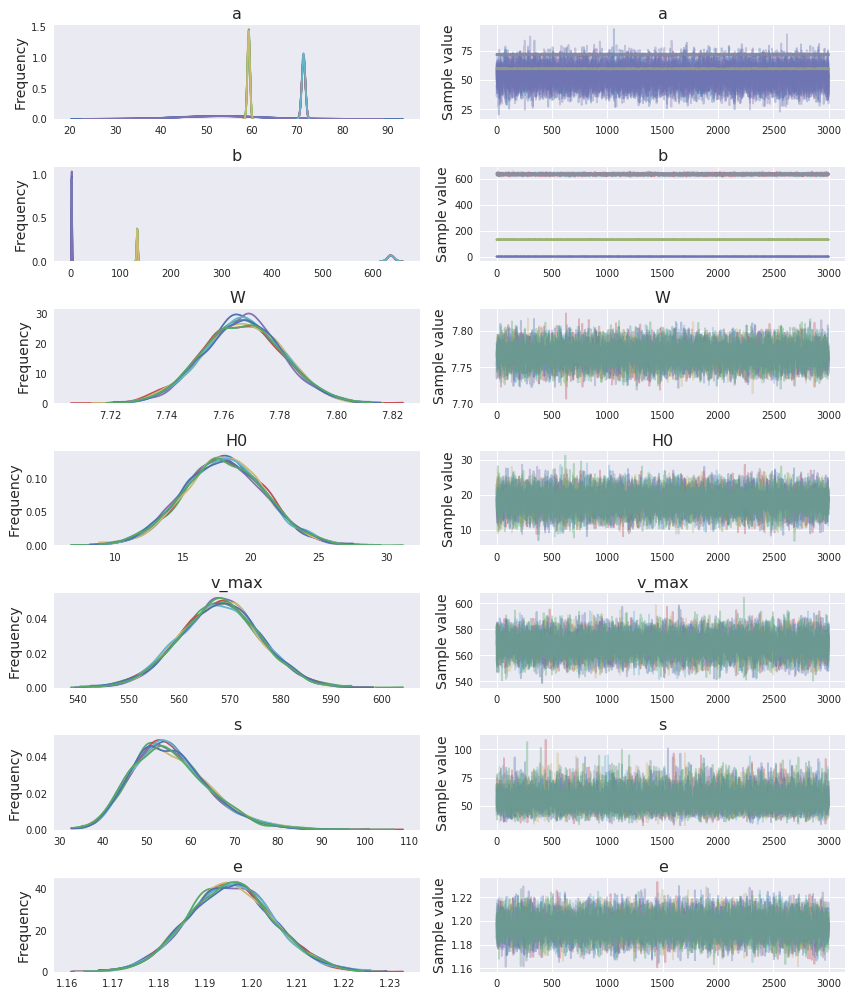

In [34]:
pm.traceplot(trace);

In [35]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
a__0_0,52.967137,8.396734,0.065338,36.917971,69.979656,14543.0,0.999954
a__1_0,59.383729,0.278796,0.002339,58.851193,59.943068,14769.0,1.000028
a__2_0,71.475658,0.386102,0.002747,70.747216,72.262148,18067.0,0.999874
b__0_0,3.233884,0.433952,0.003873,2.431136,4.113982,12694.0,1.000132
b__1_0,132.932313,1.050669,0.008423,130.866148,134.971758,17019.0,0.999960
b__2_0,635.373060,5.842485,0.047604,624.100723,646.932817,20119.0,1.000150
W,7.766939,0.014029,0.000098,7.739771,7.794922,24000.0,1.000054
H0,18.010374,2.997014,0.017675,12.199179,23.991219,24000.0,0.999925
v_max,568.051866,7.949586,0.046011,552.773030,583.911535,24000.0,0.999884
s,55.537998,8.786490,0.050109,39.888797,73.164932,24000.0,1.000020


In [36]:
ppc = pm.sample_ppc(trace, 1000, max_model)
post = ppc['obs'].mean(axis=0)

100%|██████████| 1000/1000 [00:01<00:00, 552.87it/s]


In [39]:
def harvey(v, a, b):
    return 2 * np.sqrt(2) / np.pi * (a**2 / b) / (1 + (v/b)**4)

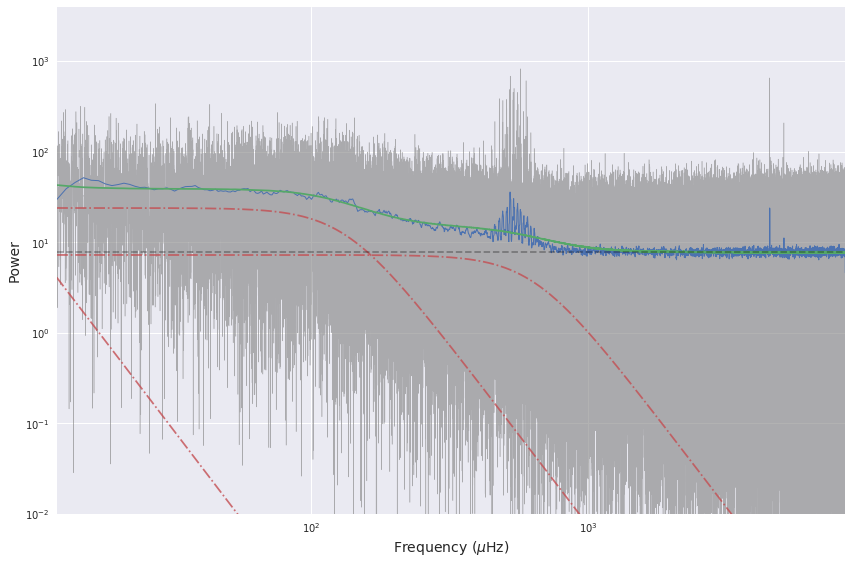

In [41]:
plt.loglog(full_freq, power, lw=.5, alpha=.6, c='.5')
plt.loglog(freq, itrp_power, 'C0', lw=1)
plt.loglog(freq, post, 'C1')
# plt.axvline(trace['v_max'].mean(), c='k', ls='--')
a = trace.get_values('a').mean(axis=0)
b = trace.get_values('b').mean(axis=0)
[plt.loglog(freq, harv, 'C2-.', alpha=.8) for harv in harvey(freq, a, b)]
plt.axhline(trace.get_values('W').mean(), c='k', alpha=.3, ls='--')
plt.ylim(1e-2, None)
plt.xlim(min(freq), max(freq))
plt.xlabel(r'Frequency ($\mu$Hz)')
plt.ylabel('Power')
plt.tight_layout();

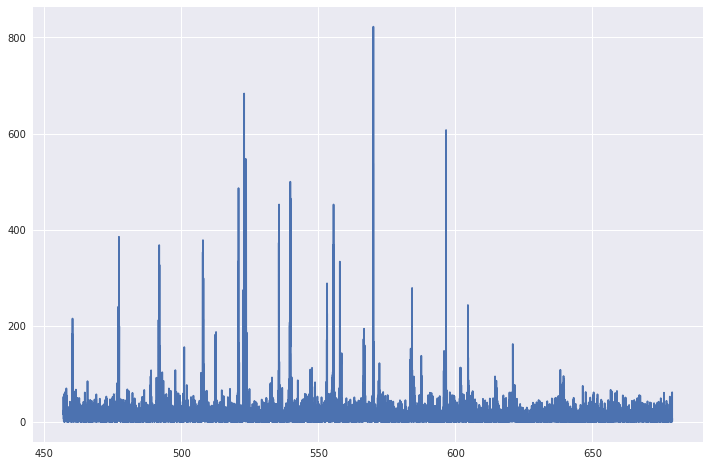

In [42]:
s = trace.get_values('s').mean(axis=0)
v_max = trace.get_values('v_max').mean(axis=0)
mask = (full_freq > (v_max - 2 * s)) & (full_freq < (v_max + 2 * s))
subfreq = full_freq[mask]
subpower = power[mask]
plt.plot(subfreq, subpower)

(1000,)


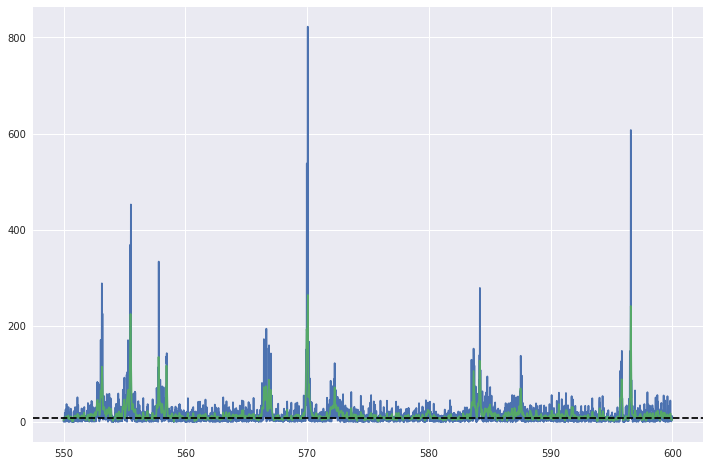

In [43]:
mask = (full_freq > 550) & (full_freq < 600)
ff = full_freq[mask]
pp = power[mask]

fstep = ff[1]-ff[0]
subfreq = np.linspace(min(ff), max(ff), 1000)
smp = cv.convolve(pp, cv.Box1DKernel(4))
subpower = np.interp(subfreq, ff, smp)

print(subpower.shape)
plt.plot(ff, pp)
plt.plot(subfreq, subpower)
plt.axhline(trace.get_values('W').mean(axis=0), ls='--', c='k')

In [45]:
modes = np.array([552, 555, 558, 567, 570, 572, 584, 587, 597, 598])
n = len(modes)
with pm.Model() as mode_model:
    A = pm.Normal('A', mu=20, sd=15, shape=(n,1))
    v0 = pm.Normal('v0', mu=modes.reshape(n,1), sd=10, shape=(n,1))
#     L = pm.Bound(pm.Normal, lower=0)('L', mu=.12, sd=1, shape=(n,1))
    L = pm.HalfCauchy('L', 1, shape=(n,1))
    
    e = pm.HalfCauchy('e', 10)
    
    like = R_v * pm.math.sum((A**2 / (np.pi * L)) / (1 + 4 * ( subfreq - v0)**2 / L**2), axis=0) + trace['W'].mean()
    
    y = pm.Normal('obs', mu=like, sd=e, observed=subpower)


You can find the C code in this temporary file: /tmp/theano_compilation_error_vopguse9


Exception: ("Compilation failed (return status=1): g++.exec: error: unrecognized command line option '-mno-sgx'. g++.exec: error: unrecognized command line option '-mno-avx5124fmaps'. g++.exec: error: unrecognized command line option '-mno-avx5124vnniw'. g++.exec: error: unrecognized command line option '-mno-clzero'. g++.exec: error: unrecognized command line option '-mno-pku'. g++.exec: error: unrecognized command line option '-mno-rdpid'. ", '[Elemwise{sub,no_inplace}(A, <TensorType(int8, (True, True))>)]')

In [121]:
with mode_model:
    mode_trace = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/opt/conda/lib/python3.6/site-packages/pymc3/model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [e_log__, L_log__, v0, A]
100%|██████████| 1500/1500 [07:52<00:00,  3.18it/s]
There were 16 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.43698241319877074, but should be close to 0.8. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
There were 565 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.34266402944516405, but sh

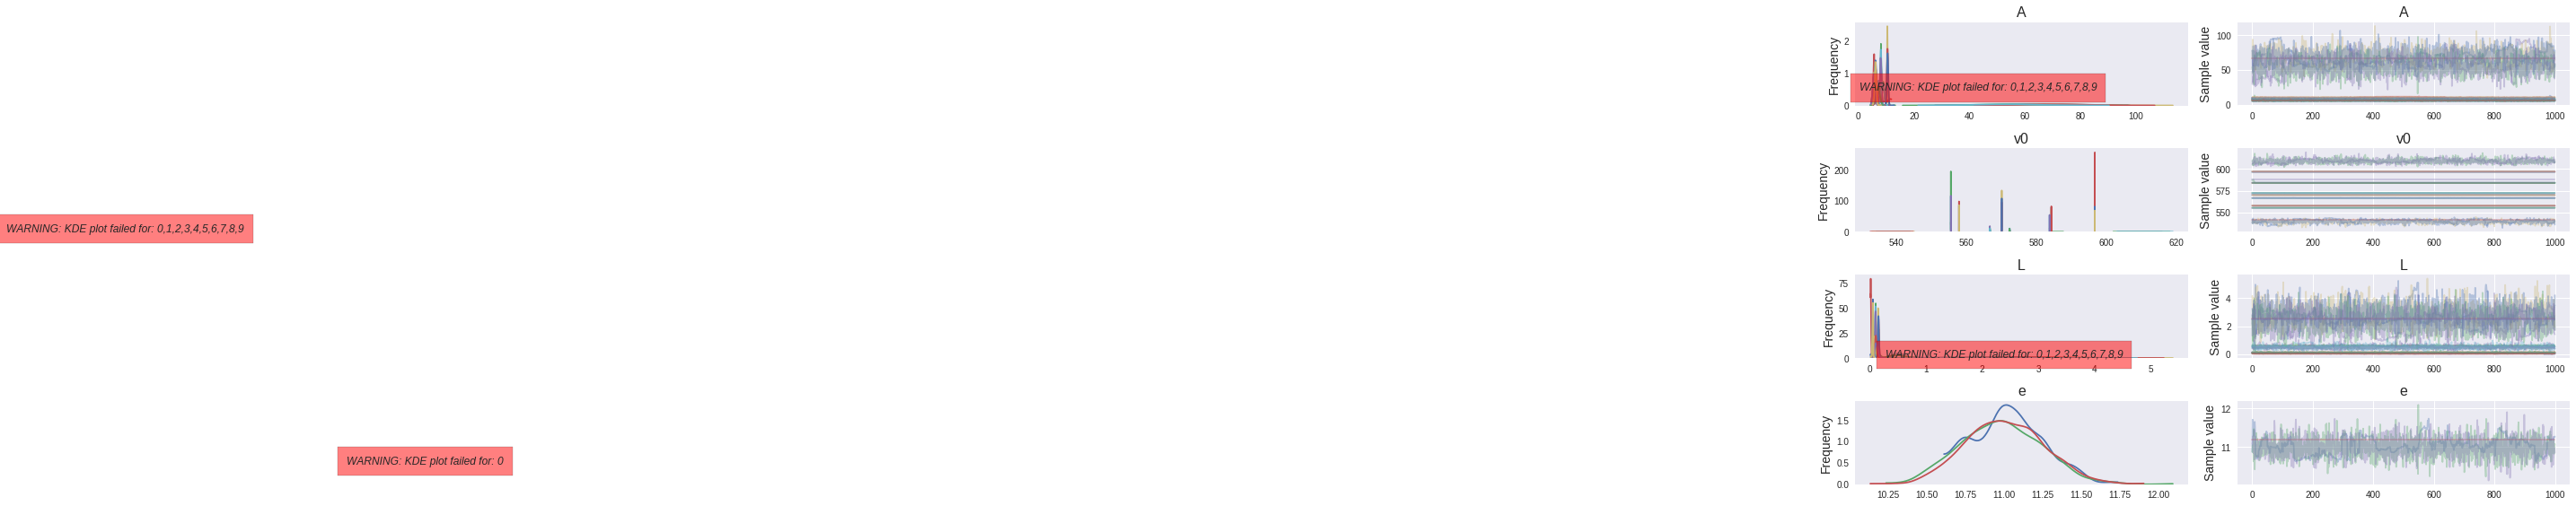

In [119]:
pm.traceplot(mode_trace);

In [87]:
prof = pm.sample_ppc(mode_trace, 1000, mode_model)['obs'].mean(axis=0)

100%|██████████| 1000/1000 [00:01<00:00, 599.97it/s]


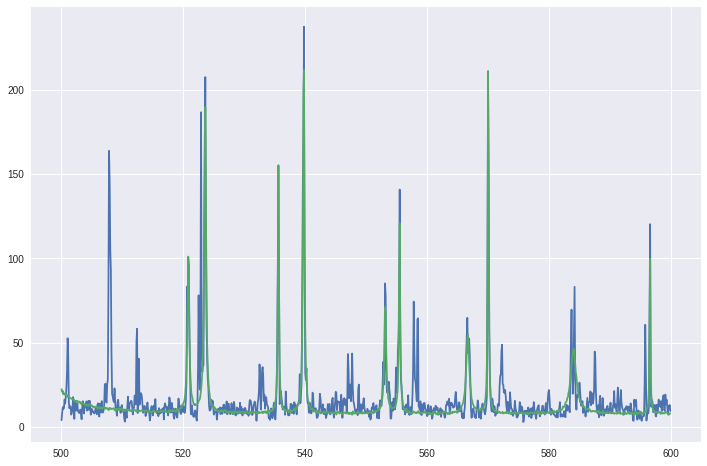

In [88]:
plt.plot(subfreq, subpower)
plt.plot(subfreq, prof, 'C1')